In [19]:
from fastbook import *
from fastai.vision.widgets import *

In [20]:
dog_types = "labrador", "schnautzer", "beagel"
path = Path("dogs")
print(dog_types)
print(path)

('labrador', 'schnautzer', 'beagel')
dogs


In [21]:
ims = search_images_ddg("schnautzer dog")
print(len(ims))

200


In [22]:
if not path.exists():
    path.mkdir()
    for type in dog_types:
        dest = (path/type)
        dest.mkdir(exist_ok=True)
        results = search_images_ddg(f'{type} dog')
        download_images(dest, urls=results)

In [23]:
fns = get_image_files(path)
fns

(#565) [Path('dogs/schnautzer/a33153bc-2602-410d-9fe1-408fa5fe02c2.jpg'),Path('dogs/schnautzer/0cd82d40-f665-4a78-b4cc-e7823546f327.jpg'),Path('dogs/schnautzer/64a46381-9628-4eb0-a5cb-be07b87855a3.jpg'),Path('dogs/schnautzer/c5edecc9-3069-41b9-a794-d95a3bfa7a00.jpg'),Path('dogs/schnautzer/dbbde8ed-d570-4f0c-a7f1-425ca9f8bb79.jpg'),Path('dogs/schnautzer/b5fedbf3-ab62-4155-8785-e349f3ef1c45.jpg'),Path('dogs/schnautzer/154afadd-0c75-4afb-8a99-6196068fca41.jpg'),Path('dogs/schnautzer/4f4bdb4c-fbee-45d3-95ab-e241a7252a77.jpg'),Path('dogs/schnautzer/e67ee6e7-c36f-40b7-a80e-3fbc2f290e47.jpg'),Path('dogs/schnautzer/620ff1c7-8e86-4f95-9273-829c46cf8154.jpg'),Path('dogs/schnautzer/a05d0861-8347-46f9-bc92-b9b3c8725603.jpg'),Path('dogs/schnautzer/40a28dae-bb77-49bc-ac4f-291faa887946.jpg'),Path('dogs/schnautzer/e4ecc95d-b066-4c18-8aa3-bdb872009d08.jpg'),Path('dogs/schnautzer/717ade63-a8a2-46f4-9e96-32e38bae38e6.jpg'),Path('dogs/schnautzer/05efe552-fcb9-437c-8a8b-31cd1db9bc2d.jpg'),Path('dogs/schnau

In [25]:
failed = verify_images(fns)
failed

(#17) [Path('dogs/schnautzer/a9775235-b8b7-4e1e-9d78-6be189d127e1.jpg'),Path('dogs/schnautzer/ae97ca54-853a-4c5d-99a6-5ce53d47291c.jpg'),Path('dogs/schnautzer/3c062419-6ff8-417a-a121-f36708e7365b.jpg'),Path('dogs/schnautzer/acf1c174-7ec2-4bfd-8a0c-f4dec3e434cd.jpg'),Path('dogs/schnautzer/08d4dc5a-ba1f-485a-bfc6-8bf8502d7d7b.jpg'),Path('dogs/schnautzer/d44cc916-7c44-445d-8be4-4b76ced289d6.jpg'),Path('dogs/schnautzer/502efdab-060f-41ba-928b-fa10b7662a88.jpg'),Path('dogs/labrador/cfb90528-2044-46dd-8d76-60be534e3780.jpg'),Path('dogs/labrador/eca53702-55e9-4388-aa95-5bbc32bfe42d.jpg'),Path('dogs/labrador/564f7063-eb3b-469c-9f33-268c3897a8f5.jpg'),Path('dogs/labrador/850bcac2-3c14-48c0-8d71-291d0088828f.jpg'),Path('dogs/labrador/8b190e36-59df-4072-a6ff-9da89df037df.jpg'),Path('dogs/labrador/09264bd0-d0e4-4bd8-8c51-101b260995f9.jpg'),Path('dogs/labrador/ddb61df4-59d2-471d-9f0d-79bf118ae21e.jpg'),Path('dogs/beagel/dcd0b4c3-02a1-42cf-9efc-8732a40bfc6e.jpg'),Path('dogs/beagel/093414a2-7674-4c6a

In [27]:
failed.map(Path.unlink)

FileNotFoundError: [Errno 2] No such file or directory: 'dogs/schnautzer/a9775235-b8b7-4e1e-9d78-6be189d127e1.jpg'

In [30]:
dogs = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128)
)

In [31]:
dls = dogs.dataloaders(path)
dls

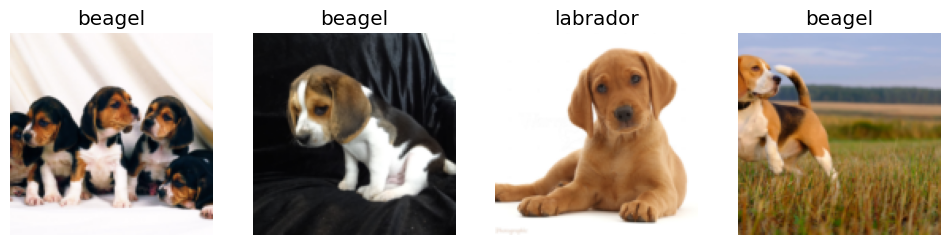

In [32]:
dls.valid.show_batch(max_n=4, nrows=1)

In [33]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.401970,0.151234,0.064220,00:14


epoch,train_loss,valid_loss,error_rate,time
0,0.405967,0.063354,0.027523,00:14
1,0.254075,0.050334,0.027523,00:14
2,0.199378,0.054289,0.009174,00:14
3,0.161529,0.058832,0.009174,00:14


In [36]:
dog_ims = search_images_ddg("beagel dog")
dog_im = dog_ims[0]
dog_image = download_url(dog_im, 'dog.jpg')


In [37]:
learn.predict(dog_image)

('beagel', tensor(0), tensor([1.0000e+00, 5.7319e-07, 9.6659e-08]))